In [1]:
import os
import time
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/buttontonesz2/42.csv/42.csv
/kaggle/input/buttontonesz2/55.csv/55.csv
/kaggle/input/buttontonesz2/33.csv/33.csv
/kaggle/input/buttontonesz2/59.csv/59.csv
/kaggle/input/buttontonesz2/56.csv/56.csv
/kaggle/input/buttontonesz2/30.csv/30.csv
/kaggle/input/buttontonesz2/36.csv/36.csv
/kaggle/input/buttontonesz2/51.csv/51.csv
/kaggle/input/buttontonesz2/38.csv/38.csv
/kaggle/input/buttontonesz2/31.csv/31.csv
/kaggle/input/buttontonesz2/35.csv/35.csv
/kaggle/input/buttontonesz2/41.csv/41.csv
/kaggle/input/buttontonesz2/45.csv/45.csv
/kaggle/input/buttontonesz2/26.csv/26.csv
/kaggle/input/buttontonesz2/28.csv/28.csv
/kaggle/input/buttontonesz2/43.csv/43.csv
/kaggle/input/buttontonesz2/52.csv/52.csv
/kaggle/input/buttontonesz2/57.csv/57.csv
/kaggle/input/buttontonesz2/40.csv/40.csv
/kaggle/input/buttontonesz2/65.csv/65.csv
/kaggle/input/buttontonesz2/44.csv/44.csv
/kaggle/input/buttontonesz2/58.csv/58.csv
/kaggle/input/buttontonesz2/61.csv/61.csv
/kaggle/input/buttontonesz2/50.csv

In [3]:
demographic = pd.read_csv("/kaggle/input/button-tone-sz/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [4]:
demographic[" group"].mean()

0.6049382716049383

In [5]:
demographic[" group"].value_counts()

 group
1    49
0    32
Name: count, dtype: int64

In [6]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - HEALTHY")
        

0 - HEALTHY
1 - HEALTHY
2 - HEALTHY
3 - HEALTHY
4 - HEALTHY
5 - HEALTHY
6 - HEALTHY
7 - HEALTHY
8 - HEALTHY
9 - HEALTHY
10 - HEALTHY
11 - HEALTHY
12 - HEALTHY
13 - HEALTHY
14 - HEALTHY
15 - HEALTHY
16 - HEALTHY
17 - HEALTHY
18 - HEALTHY
19 - HEALTHY
20 - HEALTHY
21 - HEALTHY
22 - HEALTHY
23 - HEALTHY
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - HEALTHY
59 - HEALTHY
60 - HEALTHY
61 - HEALTHY


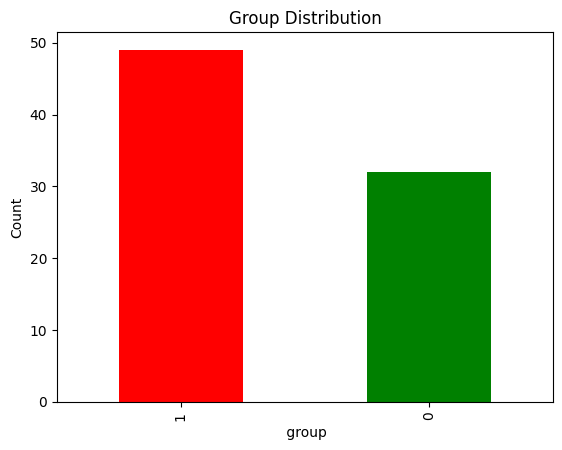

In [7]:
demographic[" group"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Group Distribution")
plt.ylabel("Count")
plt.show()


In [8]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic

In [9]:
electrodes_list = list(pd.read_csv("/kaggle/input/button-tone-sz/columnLabels.csv").columns[4:])
print("Electrodes List \n",electrodes_list)

Electrodes List 
 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


In [10]:
import os 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.signal import butter, lfilter
from tqdm import tqdm  

dataset_path1 = '/kaggle/input/button-tone-sz'
dataset_path2 = '/kaggle/input/buttontonesz2'

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data, axis=0)

def segment_data(eeg_data, window_size, overlap):
    step = int(window_size * (1 - overlap))
    windows = []
    for start in range(0, len(eeg_data) - window_size + 1, step):
        windows.append(eeg_data[start:start + window_size])
    return np.array(windows)

def extract_features(eeg_data):
    mean_features = np.mean(eeg_data, axis=0)
    std_features = np.std(eeg_data, axis=0)
    return np.concatenate([mean_features, std_features])

def load_preprocessed_data(folder_paths, diagnosis_dict, fs, lowcut, highcut, window_size, overlap):
    data = []
    labels = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            # Wrap the file processing loop with tqdm to show progress
            for file in tqdm(files, desc=f"Processing {folder_path}", unit='file'):
                if file.endswith('.csv'):
                    subject_id = os.path.splitext(file)[0]
                    if subject_id in diagnosis_dict:
                        label = diagnosis_dict[subject_id]
                        file_path = os.path.join(root, file)
                        eeg_data = pd.read_csv(file_path).values

                        # Apply bandpass filter
                        eeg_data = bandpass_filter(eeg_data, lowcut, highcut, fs)

                        # Segment data into windows
                        windows = segment_data(eeg_data, window_size, overlap)

                        # Extract features for each window
                        features = [extract_features(window) for window in windows]
                        data.extend(features)
                        labels.extend([label] * len(features))
    return np.array(data), np.array(labels)

# Parameters for preprocessing
sampling_frequency = 1024
lowcut = 1.0
highcut = 40.0
window_size = int(2 * sampling_frequency)
overlap = 0.3

# Load demographic data for labels
demographic = pd.read_csv("/kaggle/input/button-tone-sz/demographic.csv")
diagnosis_dict = dict(zip(demographic['subject'].astype(str), demographic[" group"]))

# Load and preprocess data
data_paths = [dataset_path1, dataset_path2]
X, y = load_preprocessed_data(
    data_paths, diagnosis_dict, fs=sampling_frequency, lowcut=lowcut, highcut=highcut, window_size=window_size, overlap=overlap
)

# Normalize each sample
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Demographic data analysis
print(demographic.head())
print("Mean group value:", demographic[" group"].mean())
print("Group value counts:")
print(demographic[" group"].value_counts())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)


Processing /kaggle/input/button-tone-sz: 100%|██████████| 1/1 [00:17<00:00, 17.75s/file]
Processing /kaggle/input/buttontonesz2: 0file [00:00, ?file/s]
Processing /kaggle/input/buttontonesz2: 100%|██████████| 1/1 [00:15<00:00, 15.71s/file]

   subject   group  gender   age   education
0        1       0       M    44        16.0
1        2       0       M    39        17.0
2        3       0       M    53        18.0
3        4       0       M    52        15.0
4        5       0       M    41        16.0
Mean group value: 0.6049382716049383
Group value counts:
 group
1    49
0    32
Name: count, dtype: int64


In [11]:
# Reshape for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (39730, 148, 1), Test shape: (9933, 148, 1)


In [13]:
# Import necessary libraries
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, GRU, Dense, Flatten, Reshape, Dropout, Layer, Activation, Add, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import PReLU, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply

class ChannelAttention(Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio

        # Layers for the attention mechanism
        self.global_avg_pool = GlobalAveragePooling2D()
        self.global_max_pool = GlobalMaxPooling2D()
        self.dense1 = Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = Dense(filters, activation='sigmoid')

    def call(self, inputs):
        # Global Average Pooling
        avg_pool = self.global_avg_pool(inputs)
        avg_pool = self.dense1(avg_pool)
        avg_pool = self.dense2(avg_pool)

        # Global Max Pooling
        max_pool = self.global_max_pool(inputs)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)

        # Combine both pathways
        combined = Add()([avg_pool, max_pool])
        combined = tf.expand_dims(combined, axis=1)  # Add spatial dimensions
        combined = tf.expand_dims(combined, axis=2)

        # Apply the attention mechanism
        return Multiply()([inputs, combined])

    def get_config(self):
        config = super(ChannelAttention, self).get_config()
        config.update({
            "filters": self.filters,
            "reduction_ratio": self.reduction_ratio
        })
        return config


from keras.layers import Lambda
import tensorflow as tf

from keras.layers import Bidirectional

class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = input_shape
        self.model = Sequential()

        # Reshape input_shape to (timepoints, 1, features)
        reshaped_input_shape = (input_shape[0], 1, input_shape[1])

        # CNN layers with increased filters using PReLU
        self.model.add(Conv2D(filters=128, kernel_size=(3, 1), input_shape=reshaped_input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, kernel_size=(3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, kernel_size=(3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, kernel_size=(3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D(pool_size=(2, 1)))

        # Flatten layer to prepare for BiLSTM and BiGRU
        self.model.add(Flatten())
        # Reshape to fit BiLSTM input shape
        self.model.add(Reshape((-1, 128)))

        # BiLSTM layer
        self.model.add(Bidirectional(LSTM(units=256, return_sequences=True, activation='tanh')))

        # BiGRU layer
        self.model.add(Bidirectional(GRU(units=256, return_sequences=True)))

        # Reshape before Channel Attention to add a channel dimension
        self.model.add(Reshape((-1, 1, 256)))

        # Channel Attention Layer
        self.model.add(ChannelAttention(filters=256))

        # Reshape after Channel Attention back to 3D
        self.model.add(Reshape((-1, 256)))

        # Flatten after Channel Attention
        self.model.add(Flatten())

        # Dense layers with increased units using PReLU
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())

        # Dropout for regularization
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        # Compile the model
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early Stopping and Learning Rate Scheduler
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        # Train the model
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example usage
input_shape = (X_train.shape[1], X_train.shape[2])  
model = ProposedModelFramework(classes=2, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 146, 1, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_8 (PReLU)               │ (None, 146, 1, 128)    │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 144, 1, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_9 (PReLU)               │ (None, 144, 1, 128)    │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 142, 1, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_10 (PReLU)              │ (None, 142, 1, 128)    │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 140, 1, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_11 (PReLU)              │ (None, 140, 1, 128)    │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 70, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 70, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 70, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 70, 512)        │     1,182,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 140, 1, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_attention_1             │ (None, 140, 1, 256)    │         8,464 │
│ (ChannelAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 140, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 35840)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     4,587,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_12 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_13 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_14 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,855,825 (26.15 MB)

 Trainable params: 6,855,825 (26.15 MB)

 Non-trainable params: 0 (0.00 B)

Fold 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 94s 27ms/step - accuracy: 0.7981 - loss: 0.3993 - val_accuracy: 0.9428 - val_loss: 0.1464 - learning_rate: 0.0010
Epoch 2/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9556 - loss: 0.1177 - val_accuracy: 0.9680 - val_loss: 0.0818 - learning_rate: 0.0010
Epoch 3/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9745 - loss: 0.0692 - val_accuracy: 0.9744 - val_loss: 0.0674 - learning_rate: 0.0010
Epoch 4/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9840 - loss: 0.0439 - val_accuracy: 0.9824 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 5/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9892 - loss: 0.0304 - val_accuracy: 0.9868 - val_loss: 0.0413 - learning_rate: 0.0010
Epoch 6/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9913 - loss: 0.0250 - val_accuracy: 0.9869 - val_loss: 0.0357 - learning_rate: 0.0010
Epoch 7/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step -

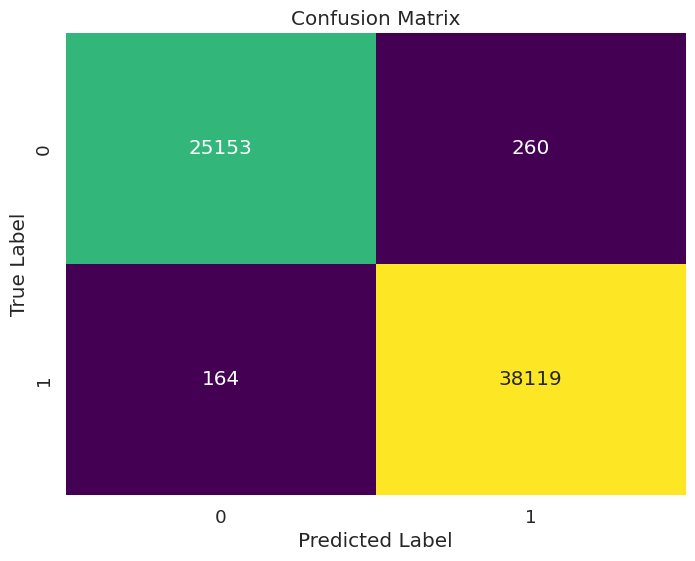

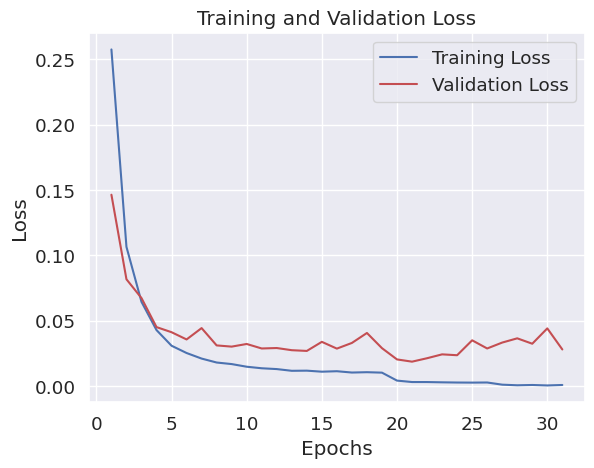

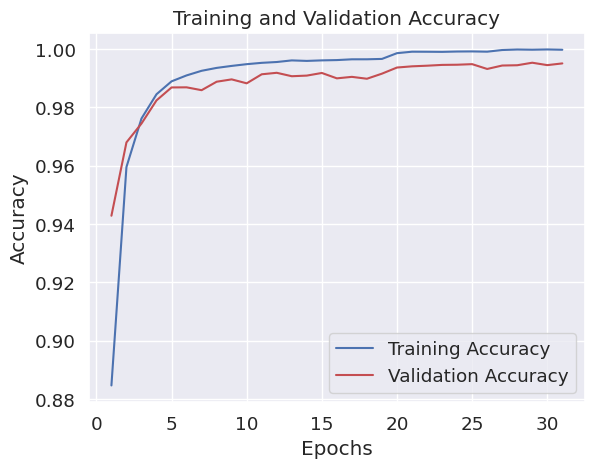

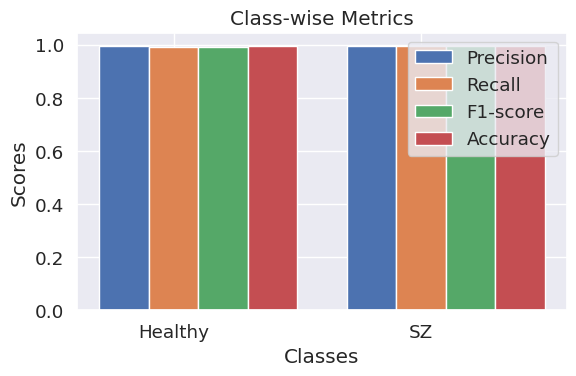

Training Accuracy: 99.97%
Validation Accuracy: 99.51%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9938 - loss: 0.0186
Testing Accuracy: 99.35%
Precision: 99.40%
Recall: 99.52%
F1-Score: 99.46%


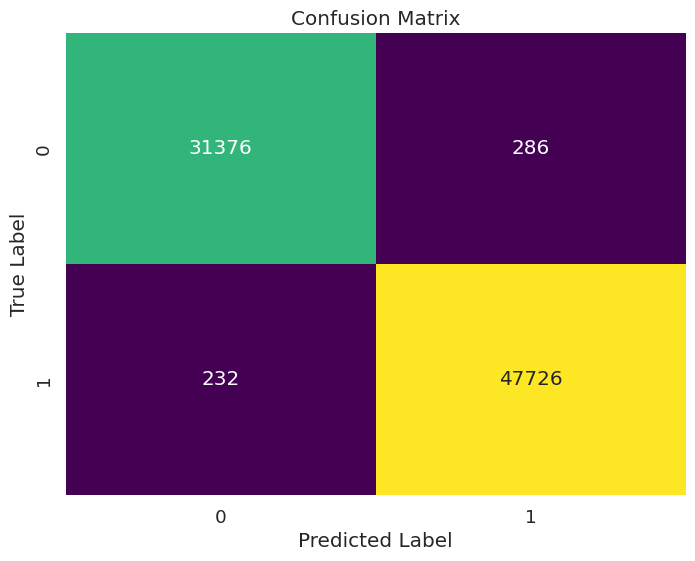

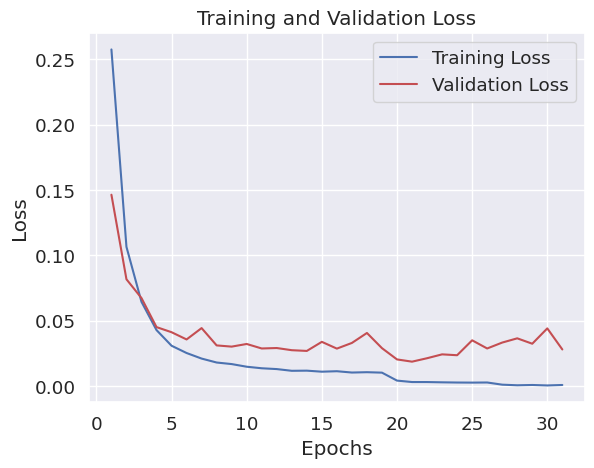

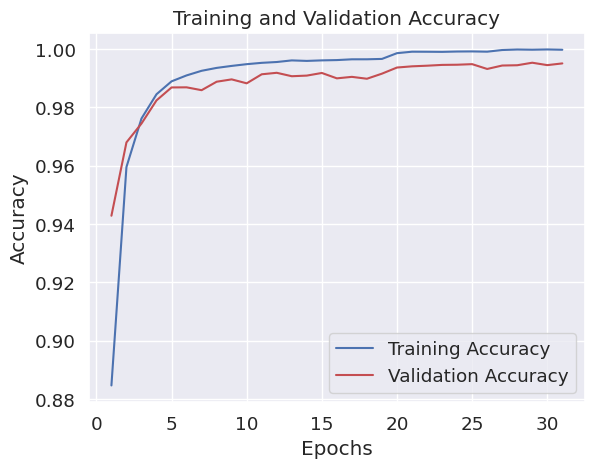

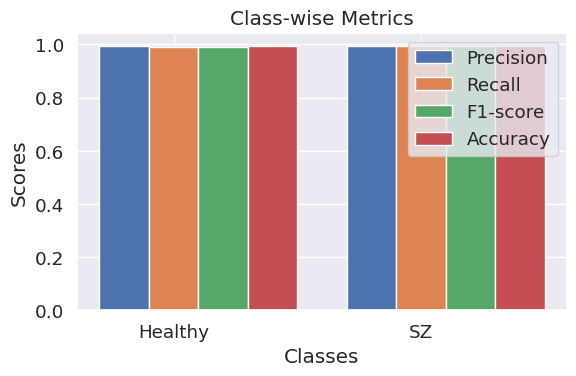

Fold 2/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 95s 28ms/step - accuracy: 0.7737 - loss: 0.4362 - val_accuracy: 0.9458 - val_loss: 0.1364 - learning_rate: 0.0010
Epoch 2/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9568 - loss: 0.1126 - val_accuracy: 0.9712 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 3/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9780 - loss: 0.0586 - val_accuracy: 0.9834 - val_loss: 0.0488 - learning_rate: 0.0010
Epoch 4/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9865 - loss: 0.0359 - val_accuracy: 0.9849 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 5/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9905 - loss: 0.0266 - val_accuracy: 0.9881 - val_loss: 0.0323 - learning_rate: 0.0010
Epoch 6/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9924 - loss: 0.0211 - val_accuracy: 0.9850 - val_loss: 0.0455 - learning_rate: 0.0010
Epoch 7/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step -

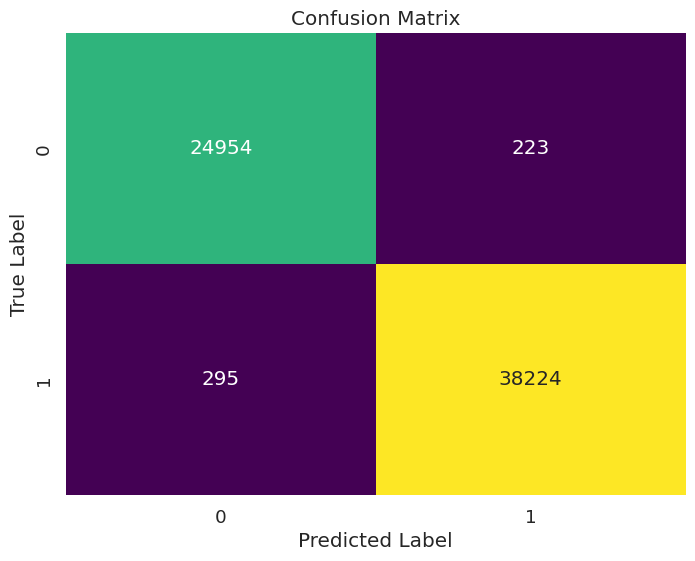

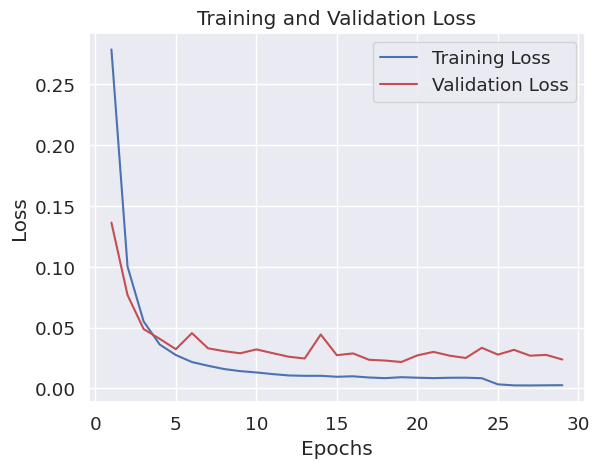

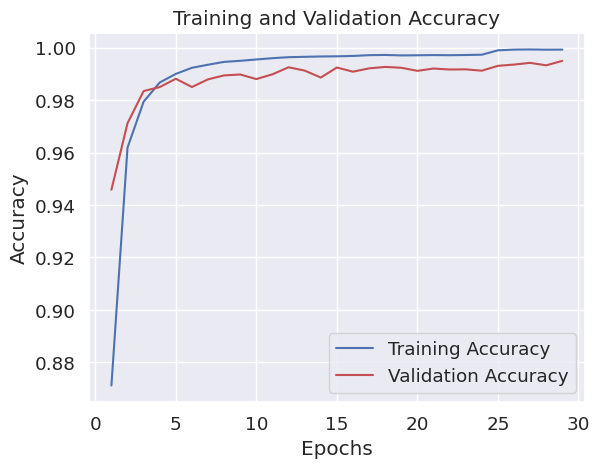

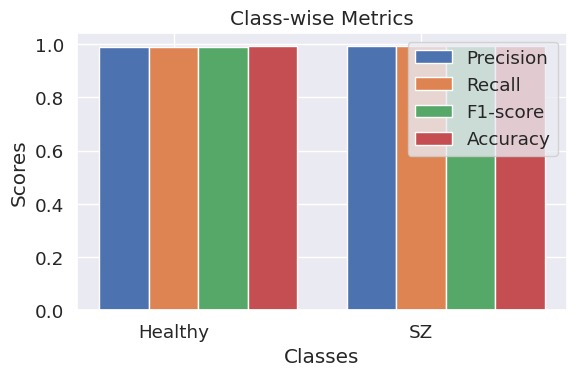

Training Accuracy: 99.92%
Validation Accuracy: 99.49%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9923 - loss: 0.0238
Testing Accuracy: 99.18%
Precision: 99.39%
Recall: 99.25%
F1-Score: 99.32%


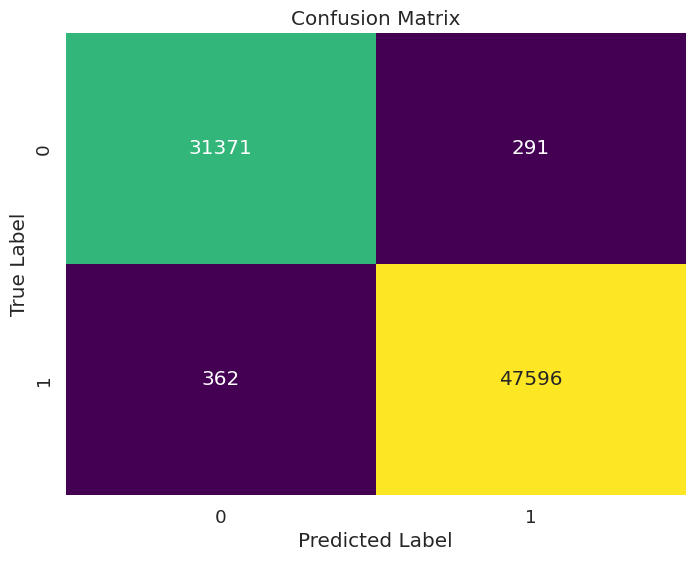

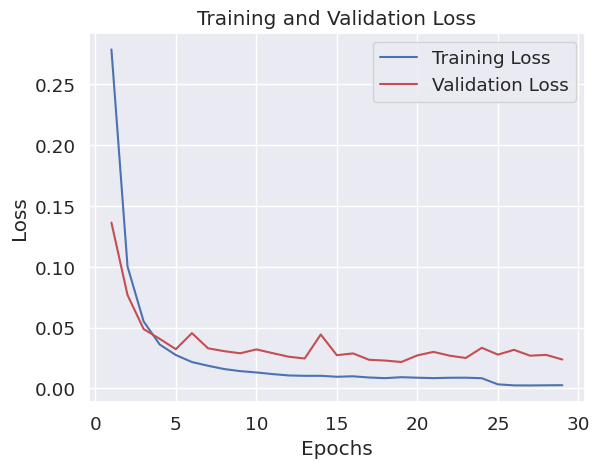

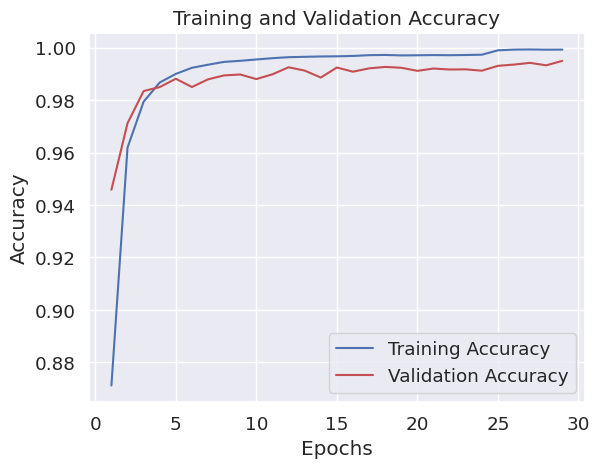

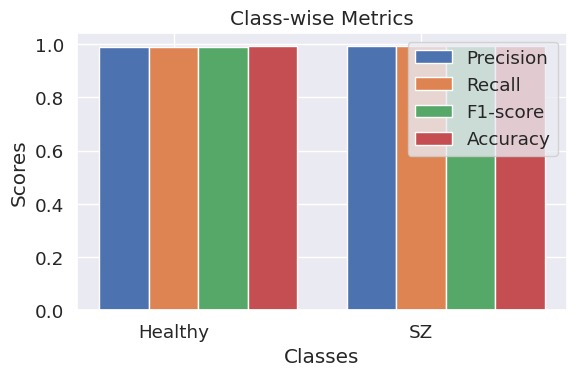

Fold 3/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 95s 28ms/step - accuracy: 0.7499 - loss: 0.4642 - val_accuracy: 0.9563 - val_loss: 0.1171 - learning_rate: 0.0010
Epoch 2/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9623 - loss: 0.1007 - val_accuracy: 0.9748 - val_loss: 0.0662 - learning_rate: 0.0010
Epoch 3/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9800 - loss: 0.0544 - val_accuracy: 0.9823 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 4/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9870 - loss: 0.0359 - val_accuracy: 0.9841 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 5/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9902 - loss: 0.0275 - val_accuracy: 0.9869 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 6/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 89s 28ms/step - accuracy: 0.9924 - loss: 0.0218 - val_accuracy: 0.9876 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 7/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 89s 28ms/step -

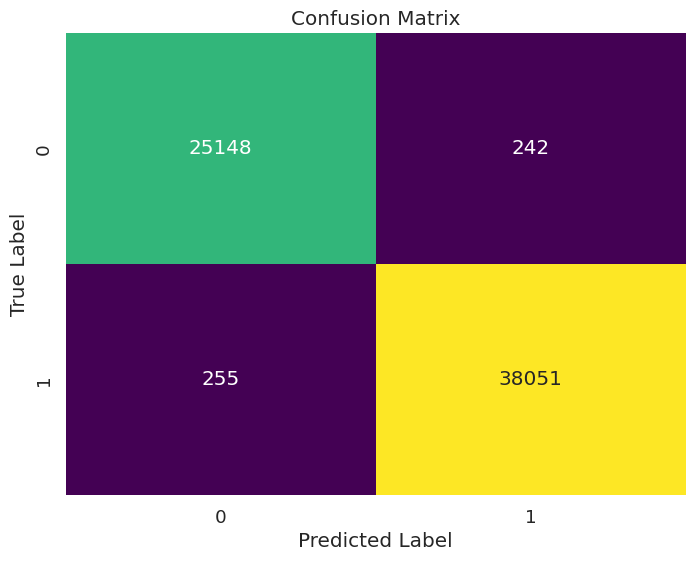

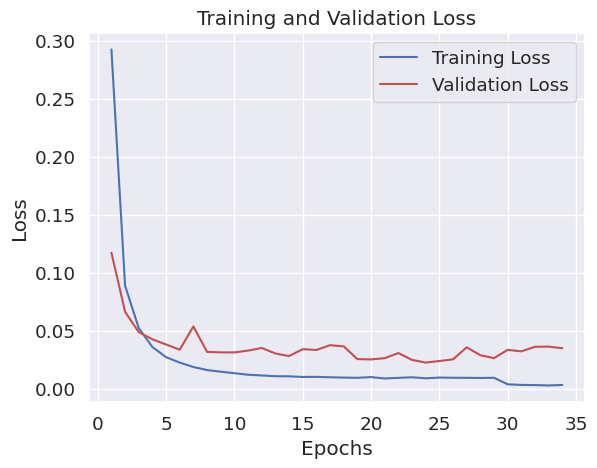

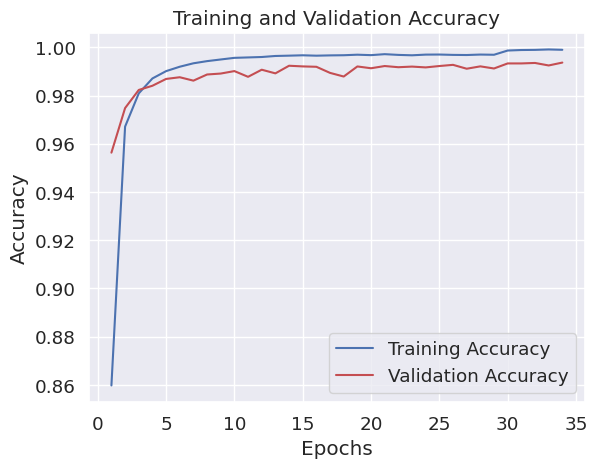

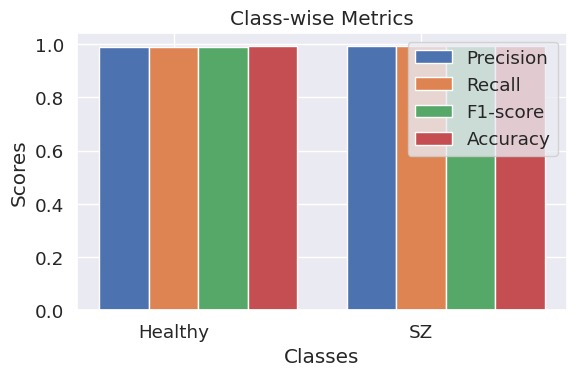

Training Accuracy: 99.90%
Validation Accuracy: 99.37%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9916 - loss: 0.0242
Testing Accuracy: 99.20%
Precision: 99.40%
Recall: 99.28%
F1-Score: 99.34%


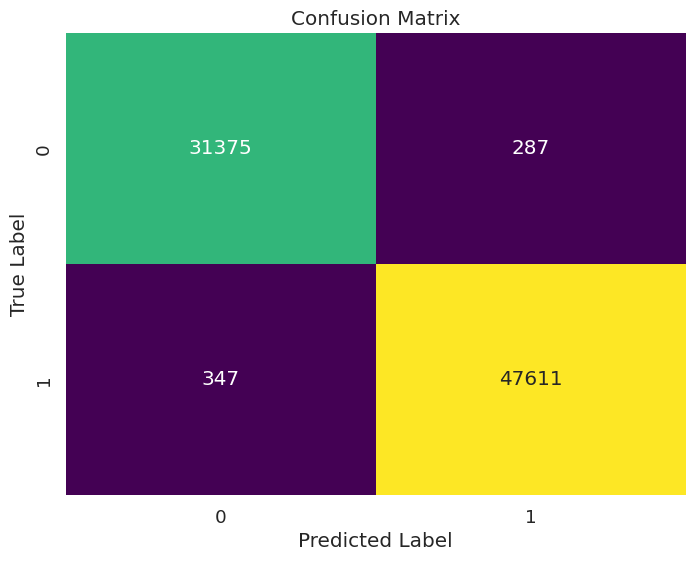

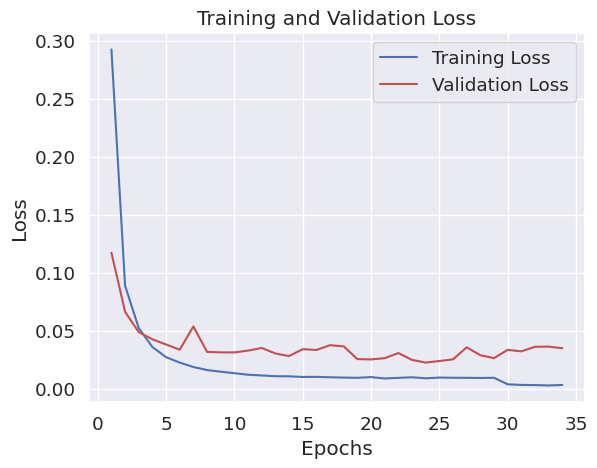

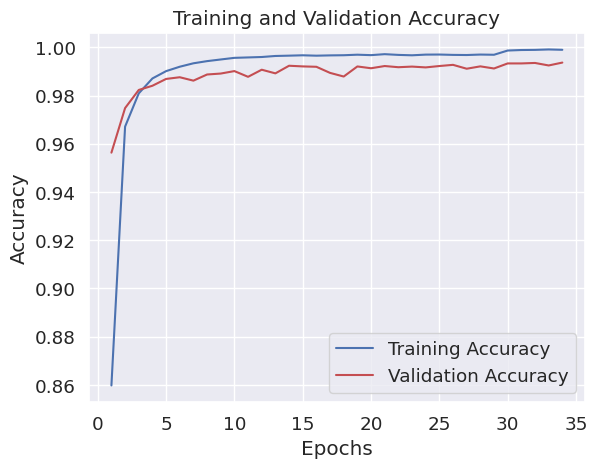

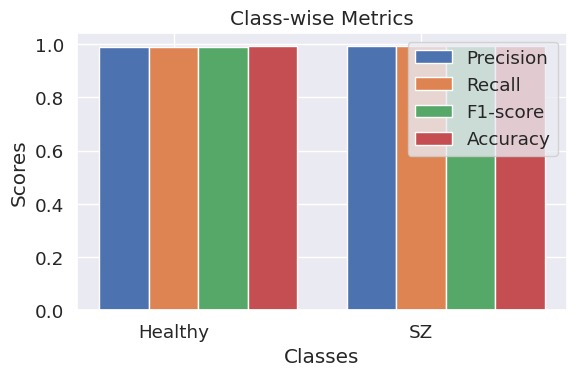

Fold 4/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 95s 28ms/step - accuracy: 0.7981 - loss: 0.3999 - val_accuracy: 0.9548 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 2/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9628 - loss: 0.0991 - val_accuracy: 0.9746 - val_loss: 0.0671 - learning_rate: 0.0010
Epoch 3/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9806 - loss: 0.0534 - val_accuracy: 0.9821 - val_loss: 0.0523 - learning_rate: 0.0010
Epoch 4/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9872 - loss: 0.0355 - val_accuracy: 0.9869 - val_loss: 0.0374 - learning_rate: 0.0010
Epoch 5/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9904 - loss: 0.0260 - val_accuracy: 0.9870 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 6/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9928 - loss: 0.0200 - val_accuracy: 0.9879 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 7/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 89s 28ms/step -

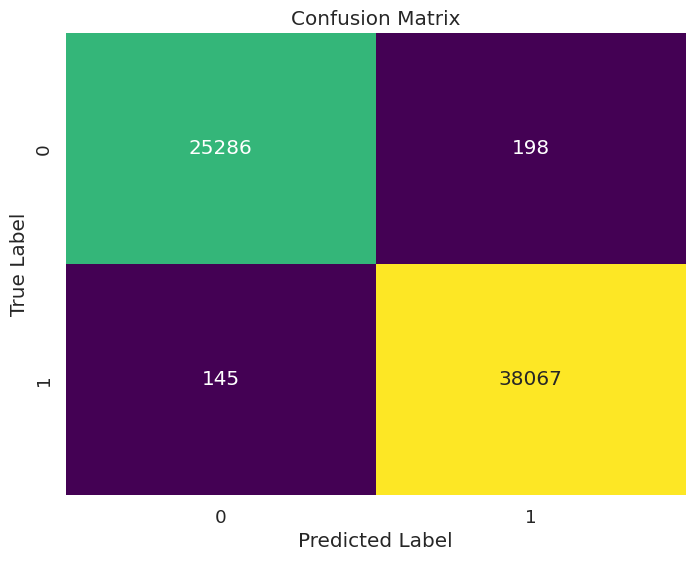

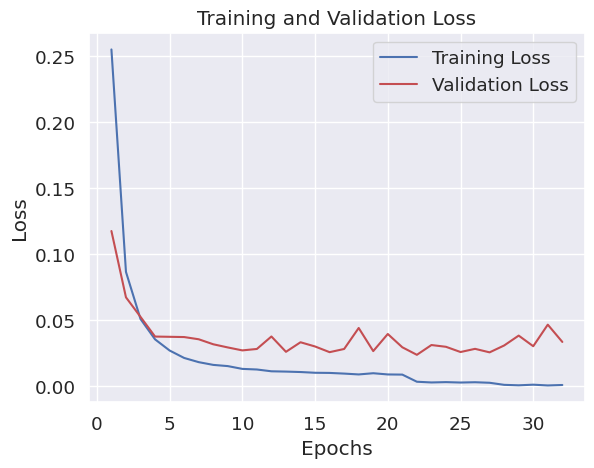

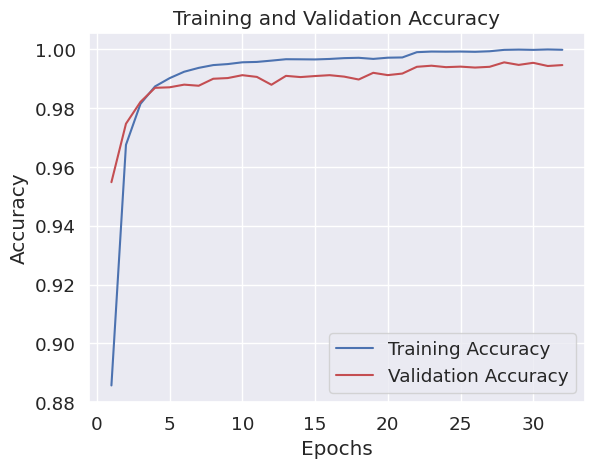

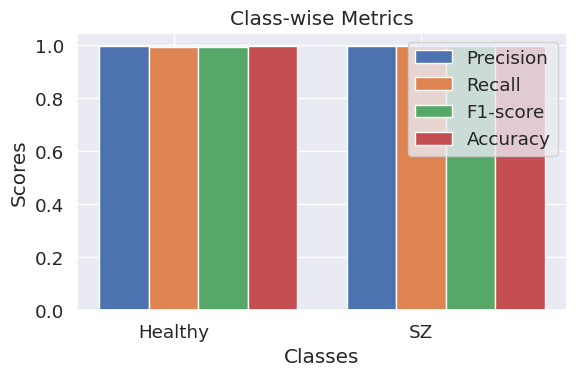

Training Accuracy: 99.98%
Validation Accuracy: 99.46%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9937 - loss: 0.0258
Testing Accuracy: 99.38%
Precision: 99.41%
Recall: 99.56%
F1-Score: 99.49%


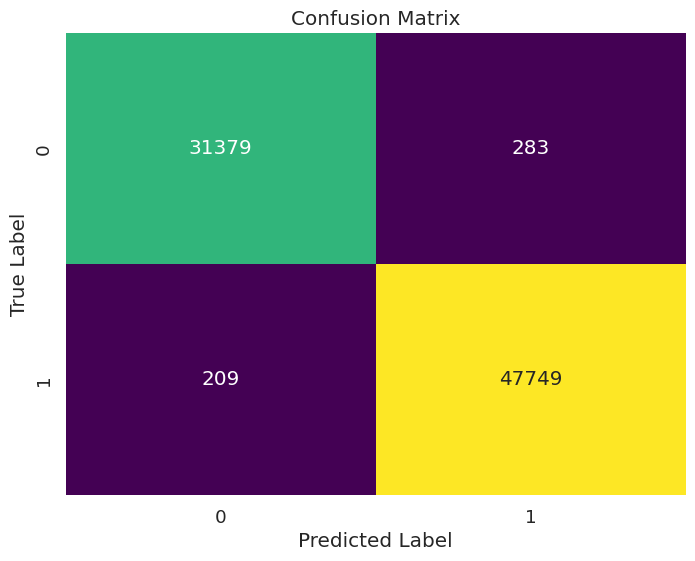

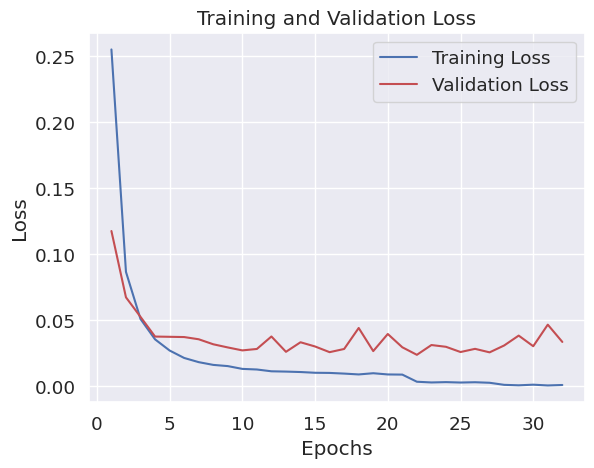

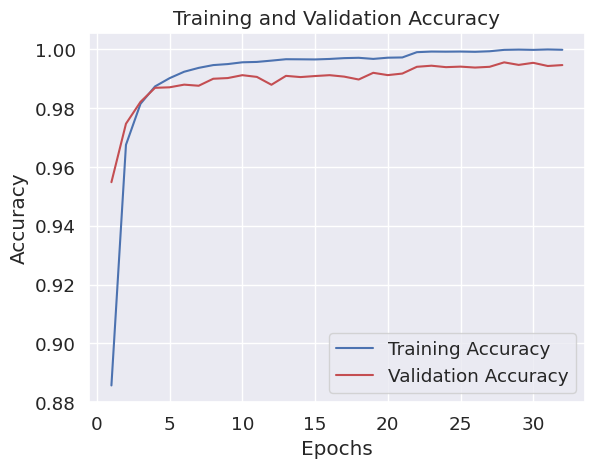

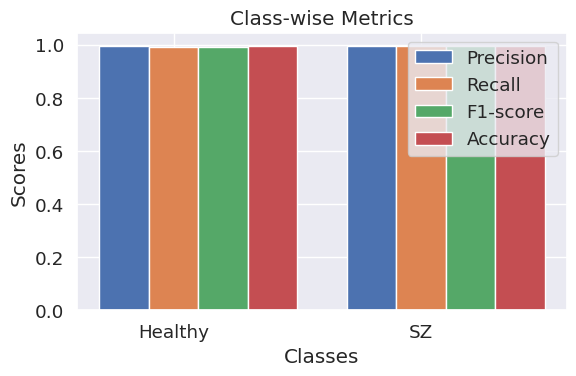

Fold 5/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 96s 29ms/step - accuracy: 0.7503 - loss: 0.4641 - val_accuracy: 0.9516 - val_loss: 0.1190 - learning_rate: 0.0010
Epoch 2/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9673 - loss: 0.0862 - val_accuracy: 0.9799 - val_loss: 0.0544 - learning_rate: 0.0010
Epoch 3/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9827 - loss: 0.0470 - val_accuracy: 0.9829 - val_loss: 0.0480 - learning_rate: 0.0010
Epoch 4/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9882 - loss: 0.0326 - val_accuracy: 0.9845 - val_loss: 0.0438 - learning_rate: 0.0010
Epoch 5/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9910 - loss: 0.0252 - val_accuracy: 0.9857 - val_loss: 0.0403 - learning_rate: 0.0010
Epoch 6/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.9928 - loss: 0.0202 - val_accuracy: 0.9887 - val_loss: 0.0376 - learning_rate: 0.0010
Epoch 7/100
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step -

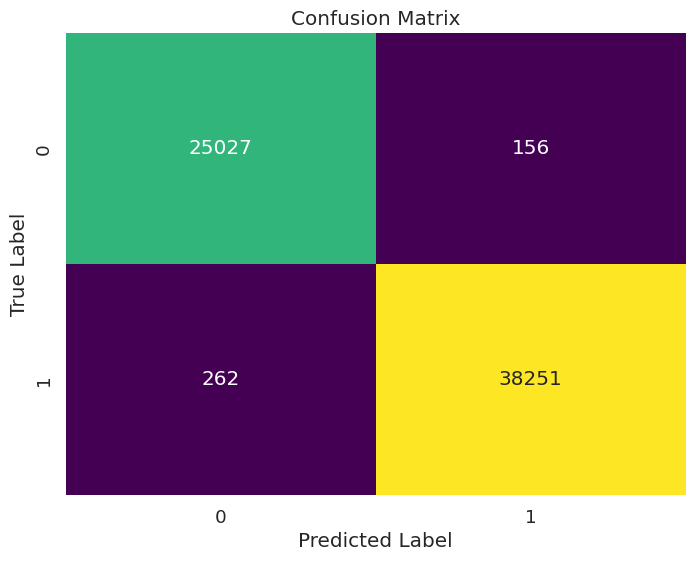

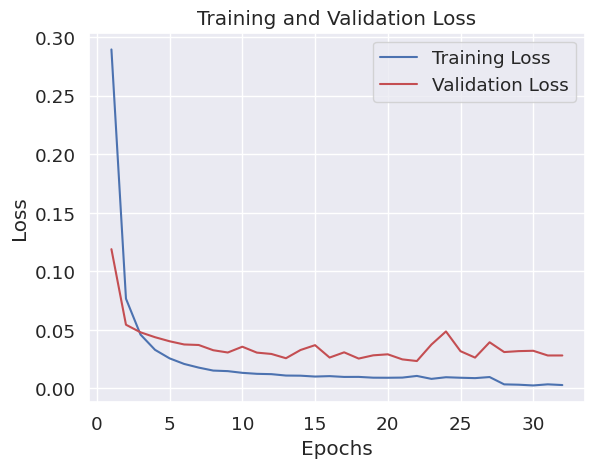

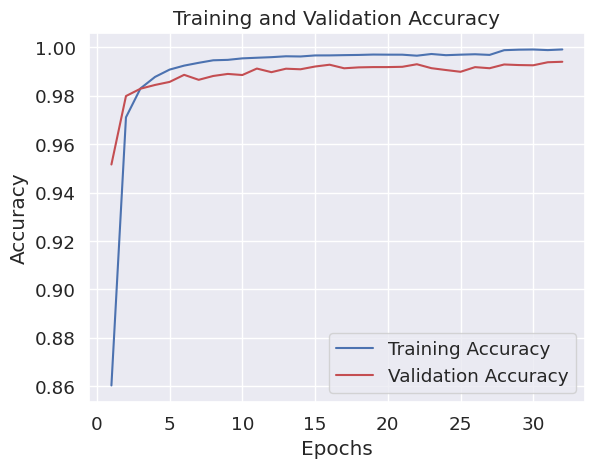

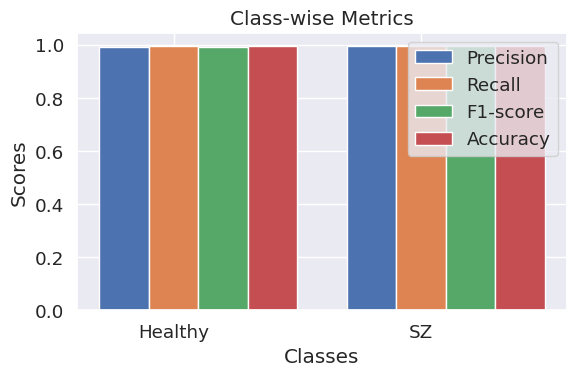

Training Accuracy: 99.91%
Validation Accuracy: 99.41%
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
2489/2489 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9927 - loss: 0.0215
Testing Accuracy: 99.26%
Precision: 99.55%
Recall: 99.23%
F1-Score: 99.39%


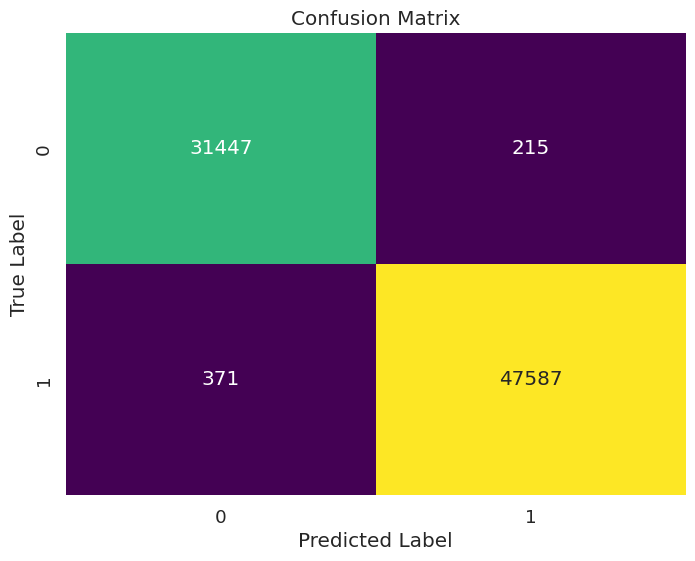

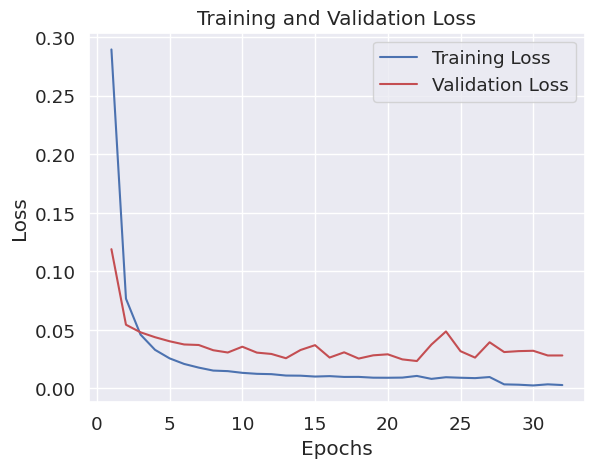

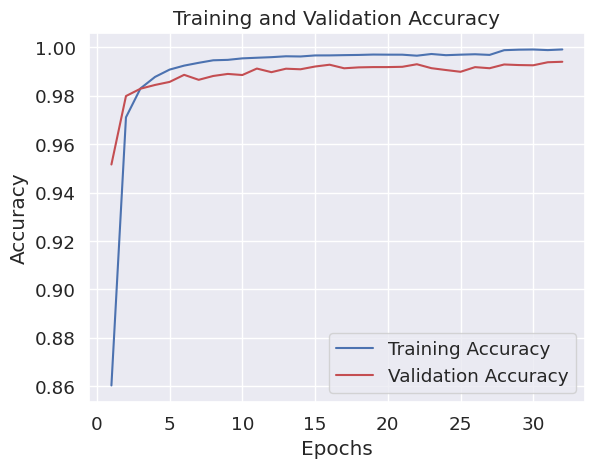

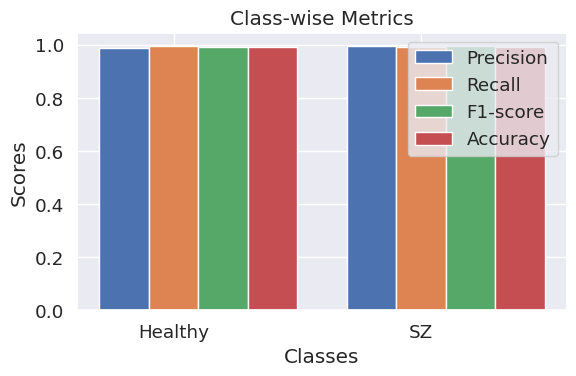

In [20]:
def plot_class_wise_metric(classes,y_test,y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels=[]

    # Define class labels

    class_labels=['Healthy','SZ']


    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy]*len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_class_bargraph.png')
    plt.show()

def plot_loss_curve(history, classes):

    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_class_loss curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_class_accuracy.png')
    plt.show()



def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



def metric_values(model,y_pred_classes,X_test,y_test):
    accuracy = model.evaluate(X_test,y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100,"%")
    print("Precision:", precision*100,"%")
    print("Recall:", recall*100,"%")
    print("F1-score:", f1_score*100,"%")

# Cross-validation function
def cross_validate(X, y, input_shape, epochs=100, batch_size=64, n_splits=5):  
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)  
    fold = 1

    for train_idx, val_idx in kfold.split(X):
        print(f"Fold {fold}/{n_splits}")

        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Normalize data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
        X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

        # Create and train the model
        model = ProposedModelFramework(2, input_shape)
        history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

        # Evaluate on the validation set
        y_pred = model.predict(X_val)
        y_pred_classes = (y_pred > 0.5).astype(int).flatten()

        # Metrics and plots for each fold
        plot_confusion_matrix(y_val, y_pred_classes)
        plot_loss_curve(history, f"Fold_{fold}")
        plot_class_wise_metric(f"Fold_{fold}", y_val, y_pred_classes)

        # Training and validation accuracy from history
        train_accuracy = history.history['accuracy'][-1]  
        val_accuracy = history.history['val_accuracy'][-1]  

        print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

        # Evaluate the model
        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

        # Evaluate on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test)

        print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
        # Calculate precision, recall, and F1-score


        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')

        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1-Score: {f1_score * 100:.2f}%")

        # Plot
        plot_confusion_matrix(y_test, y_pred_classes)
        plot_loss_curve(history, "Healthy vs Schizophrenic")
        plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

        fold += 1


input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64

# Perform 5-fold cross-validation
cross_validate(X_train, y_train, input_shape, epochs, batch_size)  
